In [2]:
from pydae.bmapu.pvs.utils.pv_builder import pv_model
import numpy as np
import matplotlib.pyplot as plt
from pydae.plot_tools import set_style
colors = set_style(plt)

In [3]:
data = {"I_sc":3.87,"V_oc":42.1,"I_mpp":3.56,"V_mpp":33.7,"N_s":72,
        "K_vt":-0.160,"K_it":0.065,"R_s": 0.5602, "R_sh": 1862, "K_d": 1.3433}

pv = pv_model('pv_test')
pv.model_params(data)
pv.R_pv_s

0.5602447674925701

In [4]:
pv.build()

system without dynamic equations, adding dummy dynamic equation


In [5]:
import pv_test

model = pv_test.model()
model.ini({'v_pv':35},{'i_pv':3,'v_mpp':40})
model.report_y()


i_pv  =  3.38
i_pv_mpp =  3.59
v_mpp = 33.44


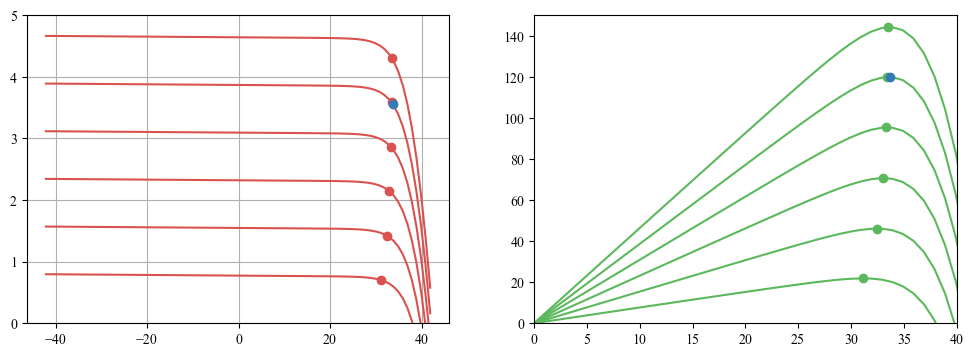

In [13]:
temp_deg = 25
v = 10
V = np.arange(-pv.V_oc,pv.V_oc,1.0)
I = np.zeros(len(V))

fig,axes = plt.subplots(ncols=2,figsize=(12,4))

irrads = np.arange(200,1400,200.0)
#irrads = [100]
for irrad in irrads:
    for it,v in enumerate(V):
        model.ini({'v_pv':v,'irrad':irrad,'temp_deg':temp_deg})
        I[it] = model.get_value('i_pv')

    axes[0].plot(V,I, color=colors[0])
    axes[1].plot(V,V*I, color=colors[1])

    v_mpp = model.get_value('v_mpp')
    model.ini({'v_pv':model.get_value('v_mpp'),'irrad':irrad,'temp_deg':temp_deg})
    axes[0].plot(model.get_value('v_mpp'),model.get_value('i_pv'), 'o',color=colors[0])
    axes[1].plot(model.get_value('v_mpp'),model.get_value('i_pv')*v_mpp, 'o', color=colors[1])
    
model.ini({'v_pv':pv.V_mpp,'irrad':1000, 'temp_deg':temp_deg})
i_mpp = model.get_value('i_pv')
    
axes[0].plot(pv.V_mpp,i_mpp, 'o', color=colors[2])
axes[1].plot(pv.V_mpp,pv.V_mpp*i_mpp, 'o',color=colors[2])

axes[0].set_ylim(0,5)
#axes[0].set_xlim(0,45)    
axes[1].set_ylim(0,150)
axes[1].set_xlim(0,40)    
axes[0].grid()
fig.savefig('shaded.svg')

(0.0, 50.0)

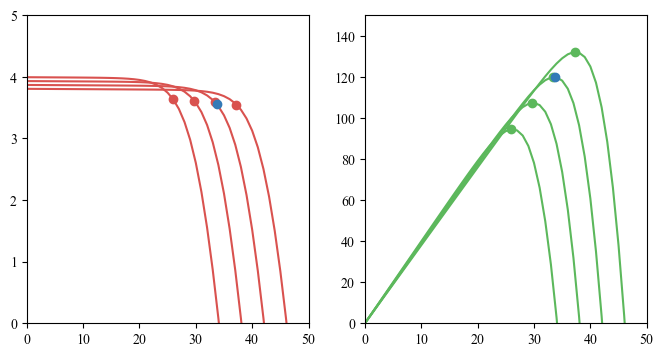

In [7]:
temp_deg = 25
v = 10
V = np.arange(0,pv.V_oc*1.2,1.0)
I = np.zeros(len(V))

fig,axes = plt.subplots(ncols=2,figsize=(8,4))

irrad = 1000
temps_deg = np.arange(0,100,25)
for temp_deg in temps_deg:
    for it,v in enumerate(V):
        model.ini({'v_pv':v,'irrad':irrad,'temp_deg':temp_deg})
        I[it] = model.get_value('i_pv')

    axes[0].plot(V,I, color=colors[0])
    axes[1].plot(V,V*I, color=colors[1])
    v_mpp = model.get_value('v_mpp')
    model.ini({'v_pv':model.get_value('v_mpp'),'irrad':irrad,'temp_deg':temp_deg})
    axes[0].plot(model.get_value('v_mpp'),model.get_value('i_pv'), 'o',color=colors[0])
    axes[1].plot(model.get_value('v_mpp'),model.get_value('i_pv')*v_mpp, 'o', color=colors[1])
    
    
model.ini({'v_pv':pv.V_mpp,'irrad':1000, 'temp_deg':25})
i_mpp = model.get_value('i_pv')
    
axes[0].plot(pv.V_mpp,i_mpp, 'o', color=colors[2])
axes[1].plot(pv.V_mpp,pv.V_mpp*i_mpp, 'o',color=colors[2])

axes[0].set_ylim(0,5)
axes[0].set_xlim(0,50)    
axes[1].set_ylim(0,150)
axes[1].set_xlim(0,50)    

In [4]:
model.ini({'v':33.7,'irrad':1000,'temp_deg':-45,'R_s':0.01},2.5)
model.report_z()

NameError: name 'model' is not defined

In [5]:
pv.V_oc

42.1

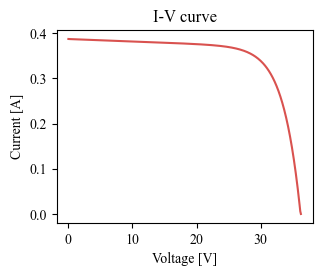

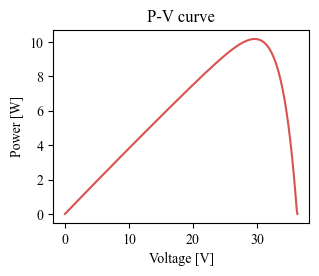

In [12]:
from photovoltaic_modeling.diode_model.single_diode_model import SingleDiodeModel
import matplotlib.pyplot as pyplot
import photovoltaic_modeling.diode_model.report_helper as report_helper

short_circuit_current = pv.I_sc
open_circuit_voltage = pv.V_oc
temperature_current_coefficient = pv.K_it
series_resistance = pv.R_pv_s
shunt_resistance = pv.R_pv_sh
diode_quality_factor = pv.K_d

number_of_series_connected_cells = pv.N_s

number_of_voltage_decimal_digits = 1

single_diode_model = SingleDiodeModel(short_circuit_current,
open_circuit_voltage,
number_of_series_connected_cells,
number_of_voltage_decimal_digits = number_of_voltage_decimal_digits,
temperature_current_coefficient = temperature_current_coefficient,
series_resistance = series_resistance,
shunt_resistance = shunt_resistance,
diode_quality_factor = diode_quality_factor)

operating_temperature = 25 + 273
actual_irradiance =100

single_diode_model.calculate(operating_temperature,
actual_irradiance)

voltages = single_diode_model.voltages
currents = single_diode_model.currents
powers = single_diode_model.powers

report_helper.write_result_to_csv_file(single_diode_model, 'single_diode_model_rng-100d_one_module_no_shading')
report_helper.plot_result(single_diode_model)

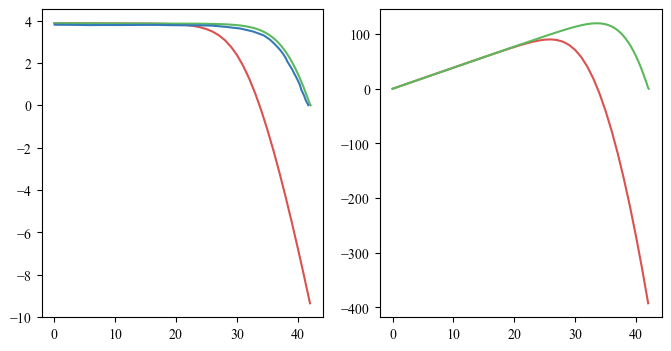

In [59]:
temp_deg = 25
v = 10
V = np.arange(0,pv.V_oc,1.0)
I = np.zeros(len(V))

fig,axes = plt.subplots(ncols=2,figsize=(8,4))

irrads = np.arange(200,1400,200.0)
irrads = [1000]
for irrad in irrads:
    for it,v in enumerate(V):
        model.ini({'v_pv':v,'irrad':irrad,'temp_deg':temp_deg})
        I[it] = model.get_value('i_pv')

    axes[0].plot(V,I, color=colors[0])
    axes[1].plot(V,V*I, color=colors[0])

voltages = single_diode_model.voltages
currents = single_diode_model.currents

axes[0].plot(voltages,currents, color=colors[1])
axes[1].plot(voltages,currents*voltages, color=colors[1])

iv_curve = np.loadtxt(r"C:\Users\jmmau\OneDrive - UNIVERSIDAD DE SEVILLA\santodomingo\temas\Tema_4 Electrónica de potencia en la generación renovable\modelo pv\msx_120_iv.csv",delimiter=",")
axes[0].plot(iv_curve[:,0],iv_curve[:,1], color=colors[2])

In [38]:
# Photovoltaic cell current calculation using single diode model
# Inputs: solar irradiance (W/m^2), cell area (m^2), temperature (K)

import math

# Constants
BOLTZMANN_CONST = 1.38e-23  # J/K - Boltzmann constant
ELEMENTARY_CHARGE = 1.6e-19  # C - elementary charge
IDEAL_FACTOR = 1.0  # dimensionless - ideal factor
SHUNT_RESISTANCE = 1e14  # Ohm - shunt resistance (very high for ideal cell)
SERIES_RESISTANCE = 0.1  # Ohm - series resistance

# Input parameters
solar_irradiance = 1000  # W/m^2 - typical irradiance for clear sky
cell_area = 0.01  # m^2 - typical area for a single cell
temperature = 298  # K - typical operating temperature

# Cell parameters (can be obtained from manufacturer's data)
voc = 0.6  # V - open-circuit voltage
isc = 0.7  # A - short-circuit current
alpha = -0.01  # V/K - temperature coefficient of short-circuit current
beta = 0.005  # V/K - temperature coefficient of open-circuit voltage

# Calculations
n = IDEAL_FACTOR
k = BOLTZMANN_CONST / ELEMENTARY_CHARGE  # Boltzmann constant / elementary charge
q = ELEMENTARY_CHARGE
Rsh = SHUNT_RESISTANCE
Rs = SERIES_RESISTANCE
Iph = cell_area * solar_irradiance * isc  # photo-generated current
Is = math.exp(q * voc / (n * k * temperature)) / Rs  # reverse saturation current
I0 = Is - Iph  # diode saturation current

# Solve for the operating point of the cell using Newton-Raphson method
v = 0.5  # initial guess for voltage
tolerance = 1e-6  # convergence tolerance
max_iterations = 100  # maximum number of iterations
for i in range(max_iterations):
    f = I0 * (math.exp(q * (v + Iph * Rs) / (n * k * temperature)) - 1) - (v + Iph * Rs) / Rsh - v
    df = I0 * (q / (n * k * temperature)) * math.exp(q * (v + Iph * Rs) / (n * k * temperature)) + 1 / Rsh + 1
    delta_v = -f / df
    v = v + delta_v
    if abs(delta_v) < tolerance:
        break

# Calculate the output current and power
voltage = v + Iph * Rs
current = I0 * (math.exp(q * voltage / (n * k * temperature)) - 1) + (voltage - Iph * Rs) / Rsh
power = voltage * current

# Output
print(f"Current output of the photovoltaic cell: {current:.2f} A")


Current output of the photovoltaic cell: 6789195182059119616.00 A


In [39]:
# Photovoltaic cell current calculation using single diode model
# Inputs: solar irradiance (W/m^2), cell area (m^2), temperature (K)

import math

# Constants
BOLTZMANN_CONST = 1.38e-23  # J/K - Boltzmann constant
ELEMENTARY_CHARGE = 1.6e-19  # C - elementary charge
IDEAL_FACTOR = 1.0  # dimensionless - ideal factor
SHUNT_RESISTANCE = 1e14  # Ohm - shunt resistance (very high for ideal cell)
SERIES_RESISTANCE = 0.1  # Ohm - series resistance

# Input parameters
solar_irradiance = 1000  # W/m^2 - typical irradiance for clear sky
cell_area = 0.01  # m^2 - typical area for a single cell
temperature = 298  # K - typical operating temperature

# Cell parameters (can be obtained from manufacturer's data)
voc = 0.6  # V - open-circuit voltage
isc = 0.7  # A - short-circuit current
alpha = 0.01  # V/K - temperature coefficient of short-circuit current
beta = 0.005  # V/K - temperature coefficient of open-circuit voltage

# Calculations
n = IDEAL_FACTOR
k = BOLTZMANN_CONST / ELEMENTARY_CHARGE  # Boltzmann constant / elementary charge
q = ELEMENTARY_CHARGE
Rsh = SHUNT_RESISTANCE
Rs = SERIES_RESISTANCE
Iph = cell_area * solar_irradiance * isc  # photo-generated current
Is = math.exp(q * voc / (n * k * temperature)) / Rs  # reverse saturation current
I0 = Is * (math.exp(q * (voc + Iph * Rs) / (n * k * temperature)) - 1)  # diode saturation current
voltage = voc  # starting voltage for iteration

# Solve for the operating point of the cell using the single diode model
for i in range(50):  # iterate up to 50 times
    current = I0 * (math.exp(q * voltage / (n * k * temperature)) - 1) + (voltage - Iph * Rs) / Rsh
    v_t = n * k * temperature / q
    f1 = current + (voltage - voc + Iph * Rs) / Rs
    f2 = I0 * (math.exp((voltage - Iph * Rs) / (n * v_t)) - math.exp((voc + Iph * Rs) / (n * v_t))) / (n * v_t) + (voltage - voc + Iph * Rs) / (Rs * Rsh)
    delta = f1 / f2
    voltage = voltage - delta

power = voltage * current

# Output
print(f"Current output of the photovoltaic cell: {current:.2f} A")


Current output of the photovoltaic cell: -49.00 A


In [40]:
# Photovoltaic cell current calculation using single diode model
# Inputs: solar irradiance (W/m^2), cell area (m^2), temperature (K)

import math

# Constants
BOLTZMANN_CONST = 1.38e-23  # J/K - Boltzmann constant
ELEMENTARY_CHARGE = 1.6e-19  # C - elementary charge
IDEAL_FACTOR = 1.0  # dimensionless - ideal factor
SHUNT_RESISTANCE = 1e14  # Ohm - shunt resistance (very high for ideal cell)
SERIES_RESISTANCE = 0.1  # Ohm - series resistance

# Input parameters
solar_irradiance = 1000  # W/m^2 - typical irradiance for clear sky
cell_area = 0.01  # m^2 - typical area for a single cell
temperature = 298  # K - typical operating temperature

# Cell parameters (can be obtained from manufacturer's data)
voc = 0.6  # V - open-circuit voltage
isc = 0.7  # A - short-circuit current
alpha = 0.01  # V/K - temperature coefficient of short-circuit current
beta = 0.005  # V/K - temperature coefficient of open-circuit voltage

# Validate inputs
if solar_irradiance <= 0 or cell_area <= 0 or temperature <= 0:
    raise ValueError("Invalid input: solar irradiance, cell area, and temperature must be positive")

# Validate cell parameters
if voc <= 0 or isc <= 0 or alpha <= 0 or beta <= 0:
    raise ValueError("Invalid cell parameter: open-circuit voltage, short-circuit current, alpha, and beta must be positive")

# Calculations
n = IDEAL_FACTOR
k = BOLTZMANN_CONST / ELEMENTARY_CHARGE  # Boltzmann constant / elementary charge
q = ELEMENTARY_CHARGE
Rsh = SHUNT_RESISTANCE
Rs = SERIES_RESISTANCE
Iph = cell_area * solar_irradiance * isc  # photo-generated current
Is = math.exp(q * voc / (n * k * temperature)) / Rs  # reverse saturation current
I0 = Is * (math.exp(q * (voc + Iph * Rs) / (n * k * temperature)) - 1)  # diode saturation current
voltage = voc  # starting voltage for iteration

# Solve for the operating point of the cell using the single diode model
for i in range(50):  # iterate up to 50 times
    current = I0 * (math.exp(q * voltage / (n * k * temperature)) - 1) + (voltage - Iph * Rs) / Rsh
    v_t = n * k * temperature / q
    f1 = current + (voltage - voc + Iph * Rs) / Rs
    f2 = I0


In [41]:
current

-1.0000000000000009e-15

In [48]:

import numpy as np
 
# using loadtxt()
